# LIDA Demo

**Authors**: Unnati Narang, Ye Joo Park

## Overview

### What is LIDA?

> LIDA is a library for generating data visualizations and data-faithful infographics.

- [Project Website](https://microsoft.github.io/lida/)
- [GitHub Repository](https://github.com/microsoft/lida/tree/main)

We will demonstrate a basic usage of the LIDA package in this notebook. 

## Setup

If you're using Google Colab, uncomment and run the line below to install the `lida` package.

In [1]:
# !pip install lida

Import the required packages.

In [2]:
from lida import Manager, TextGenerationConfig, llm 
from lida.utils import plot_raster 
import os
import pandas as pd

Read the OpenAI API Key from a text file and store it into the `OPENAI_API_KEY` variable.

In [3]:
OPENAI_API_KEY = open('OPENAI_API_KEY.txt', 'r').read()

# another option is to directly set the OpenAI API key
# be careful not to accidently publish your API Key
# OPENAI_API_KEY = "YOUR_OPENAI_API_KEY_GOES_HERE"

## Nike and Adidas Stock Prices

### 1.1 Summarize Data, Generate Goals

Lida offers a manager class that exposes core functionality of the LIDA system. Run the code below to initialize the `Manager` with `openai` as the backend.

In [4]:
lida = Manager(
    text_gen = llm(
        provider="openai",
        api_key=OPENAI_API_KEY
    )
)

Each manager method takes a `textgen_config` argument which is a dictionary that can be used to configure the text generation process (with parameters for model, temperature, max_tokens, etc). One of the keys in this dictionary is use_cache. If set to True, the manager will cache the generated text associated with that method. Use for speedup and to avoid hitting API limits.

First, configure LIDA to use the `"gpt-4-turbo"` model.

Set the temperature to `0.2`. LLM temperature is a parameter that controls the level of randomness and creativity in the output of a Large Language Model (LLM). It's often set between 0 and 1, but can sometimes be higher. The lower the temperature, your model will be more deterministic and repetitive. For the purpose of this demo, we're using a low temperature to replicate the demo through multiple repetitions.

In [5]:
textgen_config = TextGenerationConfig(
    n=1,
    temperature=0.2,
    model="gpt-4-turbo",
    use_cache=False
)

Build a summary.

In [6]:
summary = lida.summarize(
    "nike-adidas-stock-price-2022-2023.csv",
    summary_method="default",
    textgen_config=textgen_config
)

Create goals.

In [7]:
goals = lida.goals(
    summary,
    n=2,
    textgen_config=textgen_config
)

for goal in goals:
    display(goal)


### Goal 0
---
**Question:** How do the stock prices of Adidas (ADS) and Nike (NKE) compare over the period from September 2022 to August 2023?

**Visualization:** `Line chart with 'Date' on the x-axis and both 'ADS' and 'NKE' on the y-axis`

**Rationale:** Using a line chart to plot 'ADS' and 'NKE' against 'Date' will allow us to visually compare the stock price trends of Adidas and Nike over the specified period. This visualization will help identify any patterns, correlations, or significant events affecting the stock prices of these two companies.



### Goal 1
---
**Question:** What are the volatility patterns in the stock prices of Adidas and Nike throughout the year?

**Visualization:** `Two line charts with 'Date' on the x-axis and the rolling standard deviation of 'ADS' and 'NKE' on the y-axis`

**Rationale:** Calculating the rolling standard deviation of the 'ADS' and 'NKE' stock prices and plotting them against 'Date' will provide insights into the volatility of each stock over time. This analysis is crucial for understanding the risk associated with each stock and can help in making informed investment decisions.


In [8]:
summary = lida.summarize(
    "nike-adidas-stock-price-2022-2023.csv",
    summary_method="default",
    textgen_config=textgen_config
)

goals = lida.goals(
    summary,
    n=2,
    textgen_config=textgen_config
)

for goal in goals:
    display(goal)


### Goal 0
---
**Question:** How do the stock prices of Adidas (ADS) and Nike (NKE) compare over the period from September 2022 to August 2023?

**Visualization:** `Line chart with 'Date' on the x-axis and both 'ADS' and 'NKE' on the y-axis`

**Rationale:** Using a line chart to plot both 'ADS' and 'NKE' stock prices over time allows us to visually compare the trends and fluctuations in the stock prices of both companies. The 'Date' field provides the timeline, while the 'ADS' and 'NKE' fields provide the respective stock prices, helping to identify periods of growth, decline, or stability in each company's stock.



### Goal 1
---
**Question:** What is the volatility of Adidas's stock price (ADS) from September 2022 to August 2023?

**Visualization:** `Box plot of 'ADS'`

**Rationale:** A box plot of the 'ADS' field will provide a summary of the distribution of Adidas's stock prices, highlighting the median, quartiles, and potential outliers. This visualization helps in understanding the central tendency and dispersion of Adidas's stock price, which is crucial for assessing risk and stability in its stock market performance.


### 1.2 Generate Visualizations

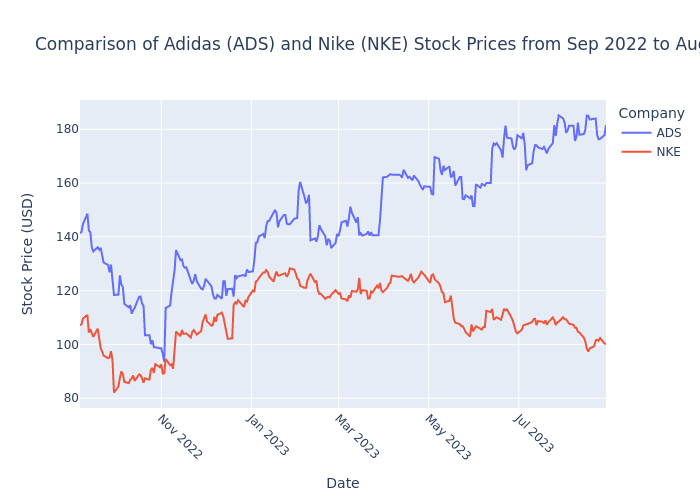

In [9]:
i = 0
library = "plotly"
charts = lida.visualize(
    summary=summary,
    goal=goals[i],
    textgen_config=textgen_config,
    library=library
)  

display(charts[0])

### 1.3 Refine the visual using natural language

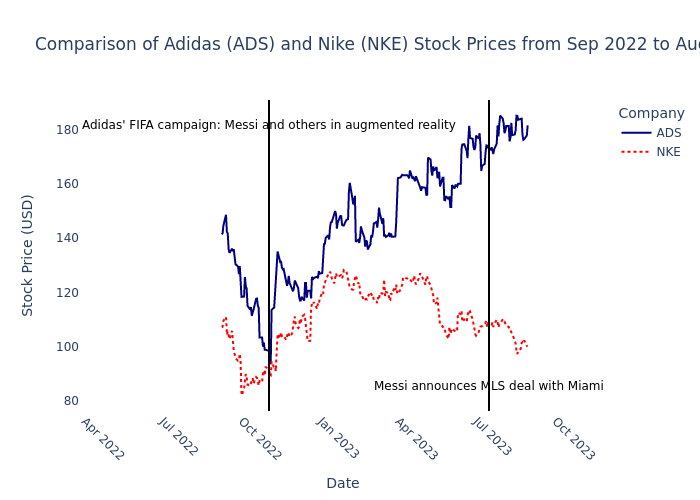

In [10]:
code = charts[0].code

instructions = [
    "use a simple_white background template",
    "get rid of gridliens",
    "change Adidas's line color to navy",
    "change Nike's line color to red",
    "change Nike's line style to dotted",
    "add a black solid vertical line on 2022-11-01",
    "add annotation on 2022-11-01 with the text \"Adidas' FIFA campaign: Messi and others in augmented reality\"",
    "add a black solid vertical line on 2023-07-15",
    "add annotation on 2022-07-15 with the text \"Messi announces MLS deal with Miami\""
]

edited_charts = lida.edit(
    code=code,
    summary=summary,
    instructions=instructions,
    library=library,
    textgen_config=textgen_config
)

edited_charts[0]

### 1.4 Explain the underlying code of the edited chart

In [11]:
code = edited_charts[0].code

explanations = lida.explain(
    code=code,
    library=library,
    textgen_config=textgen_config
) 

for row in explanations[0]:
    print(row["section"]," ** ", row["explanation"])

accessibility  **  The chart is a line graph comparing the stock prices of Adidas (ADS) and Nike (NKE) from September 2022 to August 2023. It uses navy color for Adidas and a red dotted line for Nike, enhancing visual distinction between the two companies. The chart includes annotations for significant events, making it easier to correlate stock price changes with specific events. The goal is to provide a clear visual comparison of the stock price trends between these two companies, highlighting key events that might have influenced the stock prices.
transformation  **  This section of the code transforms the 'Date' column in the DataFrame to datetime objects, allowing for accurate time series plotting. It also filters out any rows where the 'Date' is not a valid datetime, ensuring that the data used for plotting is clean and free of null values.
visualization  **  This section creates a line chart using Plotly Express, setting up the x-axis as the 'Date' and the y-axis as the stock pr

### 1.5 Create a visualization via a "User Query"

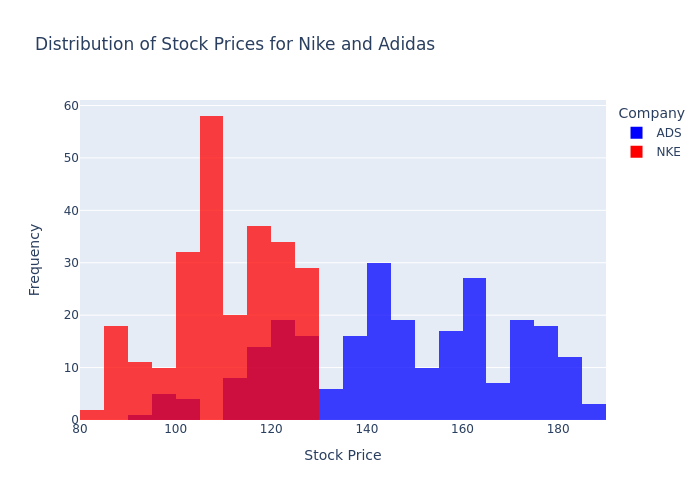

In [12]:
user_query = "What are the statistical distributions of the stock prices of Nike and Adidas?"

charts = lida.visualize(
    summary=summary,
    goal=user_query,
    textgen_config=textgen_config,
    library="plotly"
)  

charts[0]

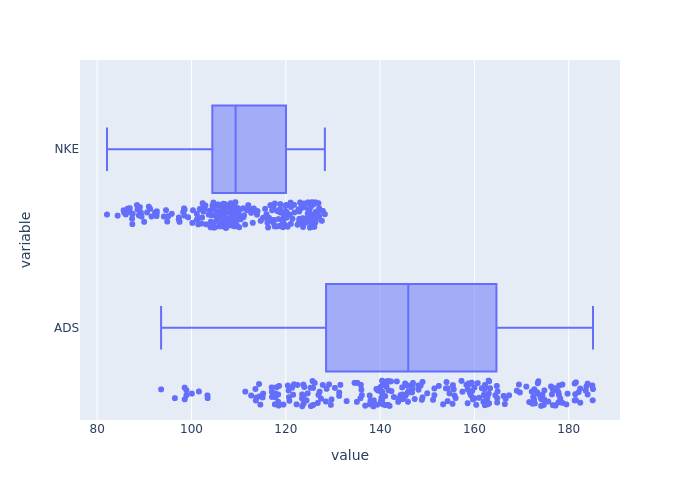

In [13]:
user_query = "What are the statistical distributions of the stock prices of Nike and Adidas? \
    Use a box plot to display the distributions."

charts = lida.visualize(
    summary=summary,
    goal=user_query,
    textgen_config=textgen_config,
    library="plotly",
)  

charts[0]